In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn 

In [2]:
train_data=pd.read_csv('Housing_data.csv')
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
train_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [4]:
train_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
pd.set_option('display.max_columns',2000)

In [7]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


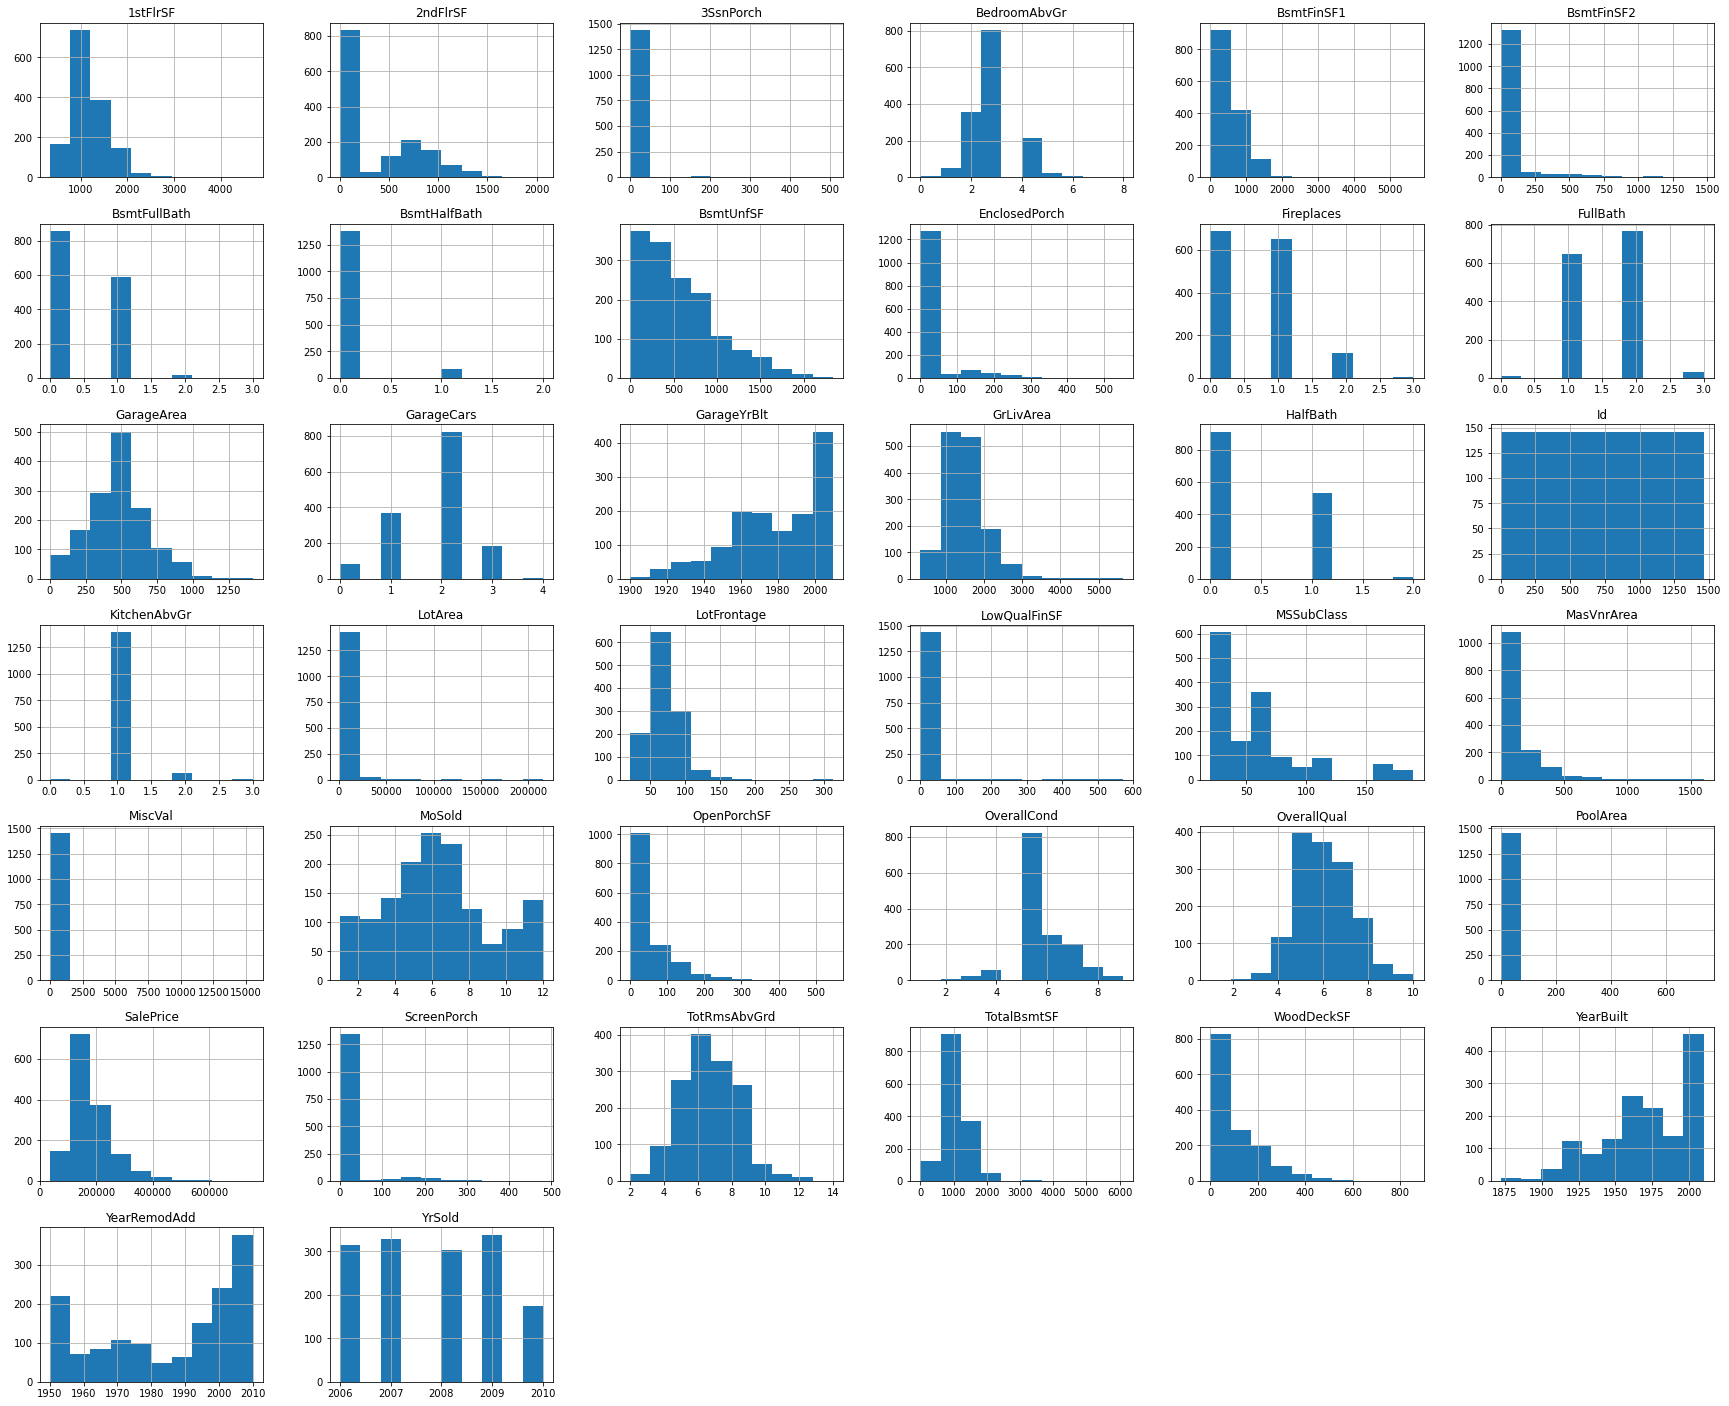

In [8]:
train_data.hist(figsize=(30,25))
plt.show()

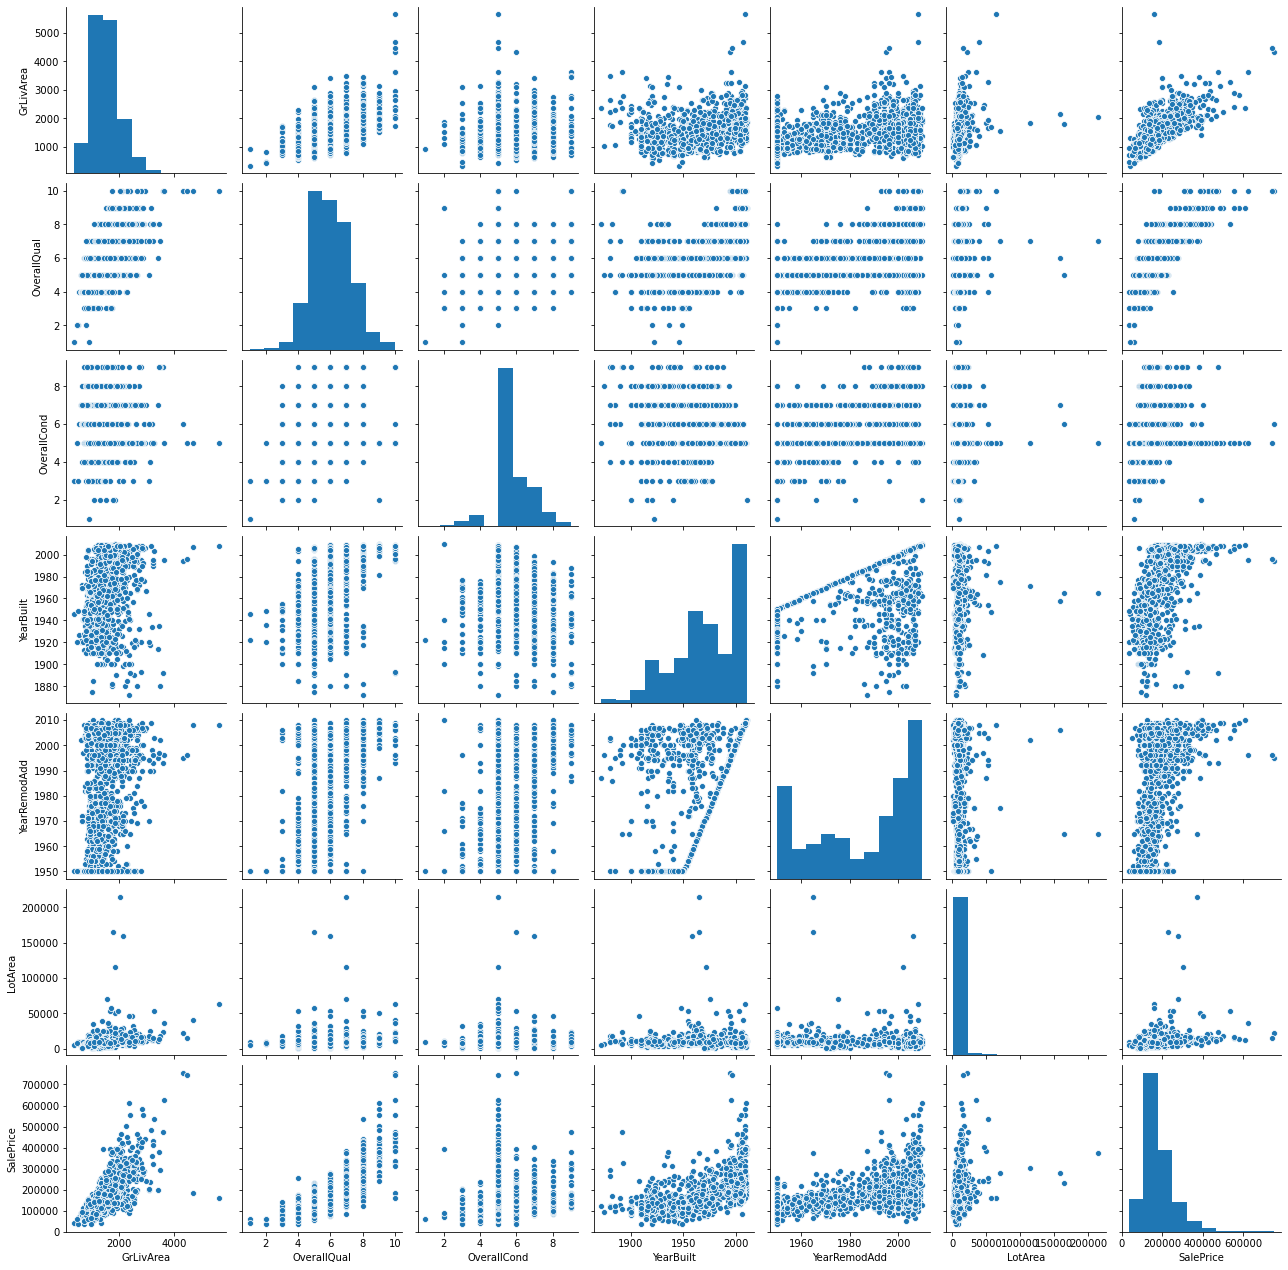

In [9]:
six_cols = ['GrLivArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'LotArea', 'SalePrice']
sns.pairplot(train_data[six_cols]) 
plt.show()

In [10]:
null_lot=[]

for col in train_data.columns:
    if (len(train_data)- train_data[col].count()) > (0.5*(len(train_data))):
        null_lot.append(col)

In [11]:
null_lot

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [12]:
train_data['Alley'].count()

91

In [13]:
(train_data['Alley'].count()/len(train_data))*100

6.232876712328768

In [14]:
train_data['PoolQC'].count()

7

In [15]:
train_data['Fence'].count()

281

In [16]:
(train_data['Fence'].count()/len(train_data))*100

19.246575342465754

In [17]:
train_data.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

In [18]:
train_data.columns.value_counts().sum()

77

In [19]:
#Checking the null values in the rows.
print('Rows having null data:'),train_data[train_data.isnull().all(axis=1)].index.tolist()

Rows having null data:


(None, [])

In [20]:
print("Number of rows having more than 5 missing values : ", len(train_data[train_data.isnull().sum(axis=1) > 5].index))
print("Number of rows having more than 5 missing values : ", 100*(len(train_data[train_data.isnull().sum(axis=1) > 5].index) / len(train_data.index)))

Number of rows having more than 5 missing values :  98
Number of rows having more than 5 missing values :  6.712328767123288


In [21]:
# Retaining the rows having <= 5 NaNs
train_data = train_data[train_data.isnull().sum(axis=1) <= 5]

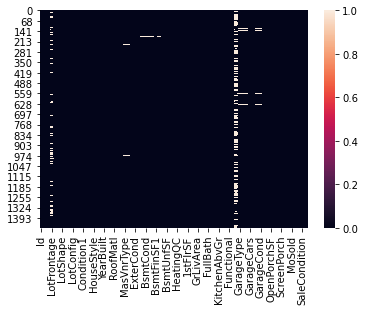

In [22]:
sns.heatmap(train_data.isnull())

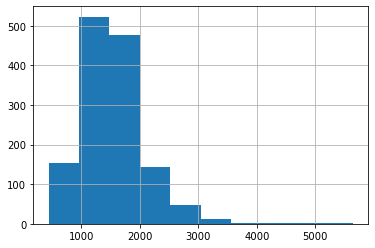

In [23]:
train_data['GrLivArea'].hist()
plt.show()

In [24]:
train_data[train_data['GrLivArea']>4000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,0,10,2007,New,Partial,184750
691,692,60,RL,104.0,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,0,1,2008,New,Partial,160000


523 and 1298, it's Overall condtiton is good. It's new. It's on over an acre. Something doesn't smell right. 
I think the sale price might be missing a zero. 
So, dropping 523 and 1298 out of data.

In [25]:
train_data=train_data.drop([523,1298])

Checking

In [26]:
train_data[train_data['GrLivArea']>4000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,0,7,2007,WD,Abnorml,745000


In [27]:
list_of_obj_col=list(train_data.select_dtypes(include='object'))
list_of_num_col=list(train_data.select_dtypes(exclude='object'))

In [28]:
def fill_na(df):
    for col in list_of_obj_col:
        df[col].fillna(value=df[col].mode()[0], inplace=True)
        
    for col in list_of_num_col:
        df[col].fillna(value=df[col].mean(), inplace=True)

In [29]:
fill_na(train_data)

In [30]:
train_data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 77, dtype: int64

In [31]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [32]:
train_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 77, dtype: object

Now we need to covert all the columns in int of float by using label encoder

In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in list_of_obj_col:
    train_data[i]=le.fit_transform(train_data[i])
    

In [34]:
train_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning           int32
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType           int32
SaleCondition      int32
SalePrice          int64
Length: 77, dtype: object

In [35]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,0,11,13,1,196.0,2,3,2,2,3,3,2,706,5,0,150,856,0,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,2,1,2003.0,1,2,548,4,4,2,0,61,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,0,7,8,2,0.0,3,3,1,2,3,1,0,978,5,0,284,1262,0,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,4,1,1976.0,1,2,460,4,4,2,298,0,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,0,11,13,1,162.0,2,3,2,2,3,2,2,486,5,0,434,920,0,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,4,1,2001.0,1,2,608,4,4,2,0,42,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,0,12,15,2,0.0,3,3,0,3,1,3,0,216,5,0,540,756,0,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,2,3,642,4,4,2,0,35,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,0,11,13,1,350.0,2,3,2,2,3,0,2,655,5,0,490,1145,0,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,4,1,2000.0,1,3,836,4,4,2,192,84,0,0,0,0,0,12,2008,8,4,250000


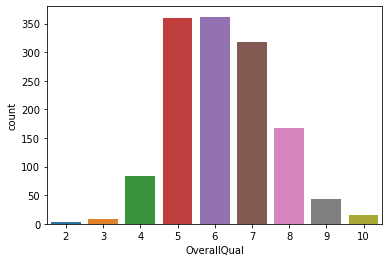

In [36]:
sns.countplot(x='OverallQual', data=train_data)

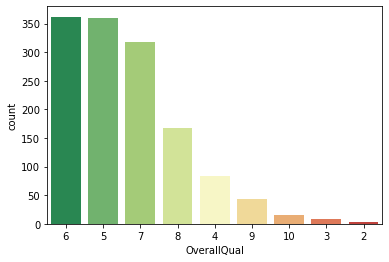

In [37]:
sns.countplot(train_data.OverallQual, order=train_data['OverallQual'].value_counts().index, palette='RdYlGn_r')
plt.show()

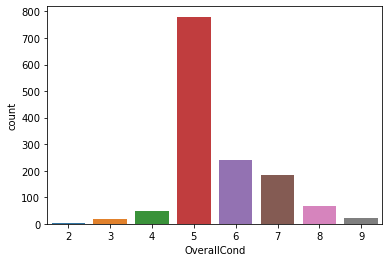

In [38]:
sns.countplot(x='OverallCond', data=train_data)

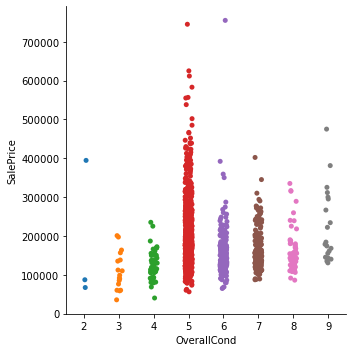

In [39]:
sns.catplot(x='OverallCond',y='SalePrice',data=train_data)

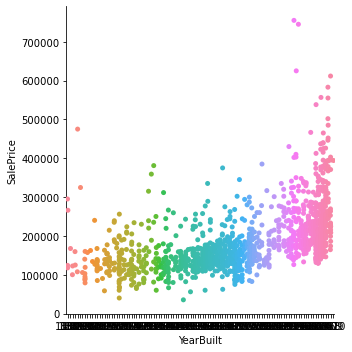

In [40]:
sns.catplot(x='YearBuilt',y='SalePrice',data=train_data)

In [41]:
train_data.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.00000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000
mean,730.733088,56.047794,3.021324,70.459605,10650.772059,0.996324,1.911029,2.791176,0.000735,3.011029,0.062500,12.379412,2.047794,2.008088,0.477206,3.088235,6.207353,5.589706,1973.027206,1985.759559,1.419853,0.075735,8.676471,10.362500,1.748529,109.125000,2.519853,2.867647,1.394853,2.248529,2.820588,2.263235,2.705147,456.859559,4.700000,49.119118,580.855882,1086.834559,0.019853,1.488235,0.954412,3.732353,1172.641912,355.769853,4.505882,1532.917647,0.435294,0.059559,1.577206,0.400735,2.865441,1.030882,2.325735,6.549265,5.755882,0.651471,2.41250,2.247059,1978.730968,1.177206,1.862500,498.434559,3.862500,3.902941,1.896324,98.297794,47.386765,21.295588,3.660294,16.168382,2.608824,42.238235,6.331618,2007.811029,7.497794,3.807353,186539.206618
std,421.008480,41.196079,0.629413,21.152460,10154.924162,0.060545,1.417912,0.682319,0.027116,1.625051,0.276219,6.057258,0.880620,0.261471,1.209264,1.913780,1.324898,1.078609,29.550346,20.295832,0.840155,0.601200,3.109913,3.509085,0.629188,183.009487,0.694488,0.387608,0.700554,0.871424,0.642053,1.148875,1.814577,434.776546,0.949652,165.757007,440.352202,389.715309,0.172554,1.736466,0.208667,0.976763,373.511640,439.395070,42.388337,502.229321,0.513473,0.239843,0.549194,0.503556,0.777903,0.177263,0.826662,1.580952,0.970102,0.642382,0.92452,1.773193,24.674423,0.812111,0.644948,187.686018,0.614569,0.514104,0.420573,127.067341,64.701105,60.820108,30.361703,57.617132,39.557876,503.956300,2.700862,1.329031,1.578459,1.053229,79022.496190
min,1.000000,20.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,438.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.00000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,35311.000000
25%,365.750000,20.000000,3.000000,60.

In [42]:
corr=train_data.corr()

In [43]:
corr

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,1.000000,0.020380,-0.010528,-0.019498,-0.039540,0.005908,0.033486,-0.011388,1.381065e-02,0.065818,0.005952,-0.008277,-0.009941,0.000414,0.019690,0.008196,-0.039536,0.010758,-0.019307,-0.022027,0.037388,-0.028346,-0.032492,-0.040808,0.051109,-0.054827,0.001268,0.015250,-0.000261,0.059098,0.008327,-0.021180,0.010305,-0.013728,0.045358,-0.004323,-0.007398,-0.025513,0.035261,0.011205,0.010817,0.023160,0.006816,-0.001069,-0.036529,0.001050,0.008792,-0.027847,0.003254,-0.006725,0.035480,0.012130,-0.007372,0.024152,-0.001176,-0.026600,0.005363,-0.000701,-0.000933,-0.011608,0.015672,0.012630,-0.003233,-0.010264,-0.009091,-0.032199,0.001201,0.002625,-0.048480,0.001228,0.050196,-0.002093,0.024672,-0.002759,0.017845,0.000685,-0.024189
MSSubClass,0.020380,1.000000,0.019145,-0.380152,-0.139960,-0.020581,0.099541,0.005957,-2.374503e-02,0.063523,-0.011902,-0.017562,-0.028257,-0.046557,0.754713,0.402256,0.049404,-0.093321,0.057454,0.040160,-0.125930,-0.031283,-0.083102,-0.135584,-0.035959,0.032127,-0.024711,0.010304,0.073235,-0.054505,0.001827,-0.044000,0.016637,-0.075477,0.054122,-0.079899,-0.141547,-0.278126,0.059698,0.009044,-0.095018,0.056349,-0.271788,0.309531,0.017904,0.070186,-0.013229,0.000382,0.114726,0.202327,-0.063678,0.232361,0.010173,0.013923,-0.012744,-0.026369,0.046024,0.118692,0.082207,-0.009513,0.005150,-0.069992,0.003515,-0.008397,-0.007741,-0.010383,0.000417,-0.021401,-0.044161,-0.021978,0.009962,-0.021185,-0.015955,-0.022656,0.011436,-0.011031,-0.079964
MSZoning,-0.010528,0.019145,1.000000,-0.098066,-0.026458,0.098606,0.055721,-0.030745,-9.193348e-04,-0.016777,-0.020369,-0.267892,-0.031047,0.034721,-0.005645,-0.114575,-0.178255,0.187401,-0.331564,-0.183349,0.015062,0.007397,0.009166,0.024483,-0.032902,-0.065129,0.196827,-0.103037,-0.252741,0.131196,-0.021481,0.042094,0.026770,-0.043517,-0.029915,0.026304,-0.037417,-0.079640,0.057076,0.149355,-0.065427,-0.094840,-0.042566,-0.054159,0.051722,-0.074674,-0.021911,0.011078,-0.205931,-0.136098,-0.000147,0.060045,0.135134,-0.031005,-0.102339,0.000195,-0.005011,0.131094,-0.276619,0.168228,-0.164976,-0.203982,-0.159815,-0.091382,-0.125070,-0.005701,-0.140581,0.144442,0.001804,0.023235,-0.002236,0.003139,-0.023641,-0.019810,0.092999,-0.008229,-0.165286
LotFrontage,-0.019498,-0.380152,-0.098066,1.000000,0.272712,-0.036865,-0.142955,-0.039567,-2.618251e-18,-0.163512,0.066142,0.087980,-0.001949,-0.007961,-0.430246,0.029909,0.209237,-0.040325,0.096790,0.069730,0.135811,0.110971,0.070617,0.093875,-0.037290,0.145859,-0.150090,0.039637,0.094279,-0.149607,0.049320,-0.132349,-0.021293,0.135098,-0.035555,0.053195,0.112783,0.300781,-0.022477,-0.071940,0.076040,0.067383,0.360757,0.053919,0.037759,0.318658,0.080609,0.002249,0.175966,0.024587,0.255223,0.007366,-0.165360,0.308395,0.031473,0.206246,0.058810,-0.248383,0.054301,-0.195513,0.276948,0.303575,0.059289,0.051749,0.077954,0.067669,0.106172,0.015917,0.065521,0.036301,0.101779,0.000777,0.030568,0.009230,-0.014074,0.036388,0.350167
LotArea,-0.039540,-0.139960,-0.026458,0.272712,1.000000,-0.217490,-0.162975,-0.146287,9.951982e-03,-0.117132,0.463602,0.045844,0.019460,0.005802,-0.206135,-0.045076,0.074372,-0.000908,-0.013068,-0.006135

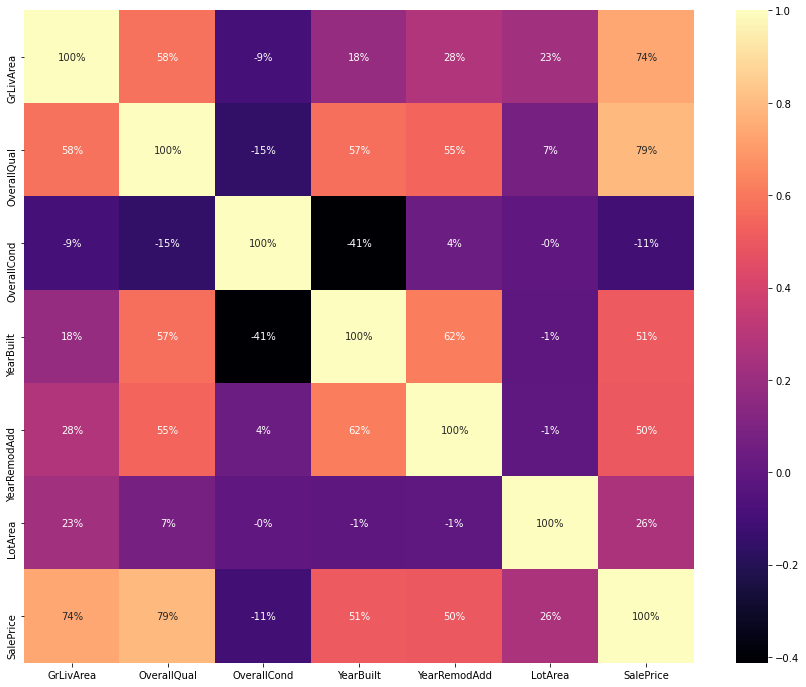

In [44]:
#Seeing the correlation via visualization
plt.figure(figsize=(15,12))
sns.heatmap(train_data[six_cols].corr(),annot=True,fmt='.0%',cmap='magma')
plt.show()

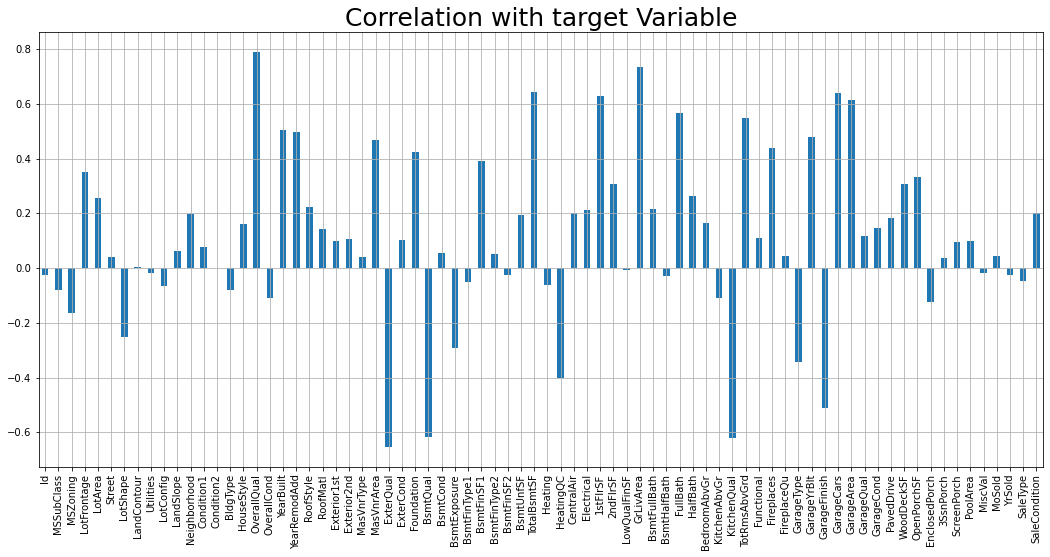

In [45]:
#Checking the correlation with target variable that is SalePrice
plt.figure(figsize=(18,8))
train_data.drop('SalePrice', axis=1).corrwith(train_data['SalePrice']).plot(kind='bar',grid=True )
plt.xticks(rotation='vertical')
plt.title("Correlation with target Variable",fontsize=25)
plt.show()

In [46]:
year_feature = [feature for feature in train_data.columns if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [47]:
for feature in year_feature:
    print(feature, train_data[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966 1959
 1994 1954 1953 1983 1975 1997 1934 1963 1981 1955 1964 1999 1972 1921
 1945 1982 1998 1956 1948 1910 1995 1991 2009 1961 1977 1985 1885 1990
 1969 1979 1967 1988 1971 1952 1936 1923 1984 1926 1941 1987 1986 1950
 2008 1908 1892 1916 1932 1918 1924 1947 1925 1900 1980 1940 1989 1992
 1949 1880 1928 1978 1996 2010 1946 1913 1937 1942 1938 1974 1922 1893
 1935 1906 1890 1914 1898 1904 1912 1882 1917 1919 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 2004 2008 1997 1959 1990 1983 1980 1966 1963 1987 1955 1964 1972
 1996 1998 1989 1953 1956 1981 1968 1992 2009 1961 1993 1999 1985 1977
 1969 1958 1991 1967 1971 1952 1975 2010 1984 1986 1979 1994 1988 1954
 1957 1982 1951 1978 1974]
GarageYrBlt [2003.         1976.         2001.         1998.         2000.
 1993.         2004.         1973.   

In [48]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,0,11,13,1,196.0,2,3,2,2,3,3,2,706,5,0,150,856,0,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,2,1,2003.0,1,2,548,4,4,2,0,61,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,0,7,8,2,0.0,3,3,1,2,3,1,0,978,5,0,284,1262,0,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,4,1,1976.0,1,2,460,4,4,2,298,0,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,0,11,13,1,162.0,2,3,2,2,3,2,2,486,5,0,434,920,0,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,4,1,2001.0,1,2,608,4,4,2,0,42,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,0,12,15,2,0.0,3,3,0,3,1,3,0,216,5,0,540,756,0,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,2,3,642,4,4,2,0,35,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,0,11,13,1,350.0,2,3,2,2,3,0,2,655,5,0,490,1145,0,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,4,1,2000.0,1,3,836,4,4,2,192,84,0,0,0,0,0,12,2008,8,4,250000


Text(0.5, 1.0, 'House Price vs YearSold')

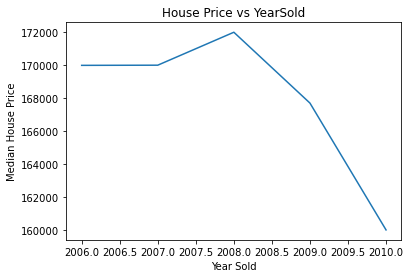

In [49]:
train_data.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

In [50]:
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

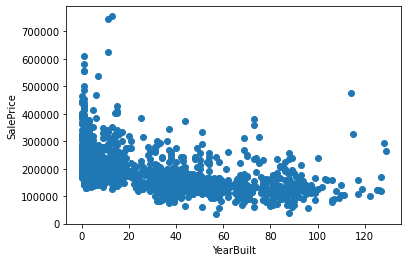

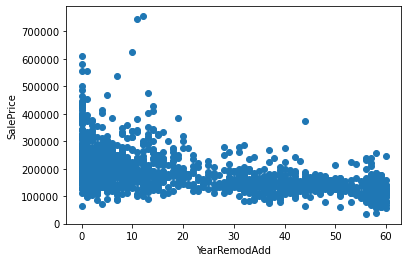

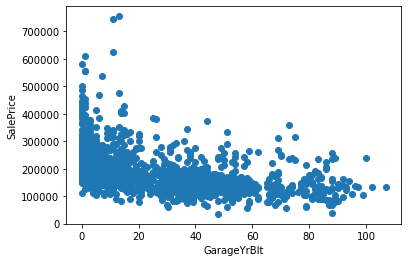

In [51]:
for feature in year_feature:
    if feature!='YrSold':
        ## We will capture the difference between year variable and year the house was sold for
        train_data[feature]=train_data['YrSold']-train_data[feature]

        plt.scatter(train_data[feature],train_data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

In [52]:
discrete_feature=[feature for feature in train_data if len(train_data[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 55


In [53]:
discrete_feature

['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'SaleType',
 'SaleCondition']

In [54]:
train_data['Foundation'].value_counts()

2    630
1    586
0    131
4      6
3      4
5      3
Name: Foundation, dtype: int64

In [55]:
train_data['LandContour'].value_counts()

3    1228
0      52
1      48
2      32
Name: LandContour, dtype: int64

In [56]:
train_data['MoSold'].value_counts()

6     238
7     218
5     191
4     129
8     113
3      97
10     85
11     77
9      56
12     53
1      52
2      51
Name: MoSold, dtype: int64

In [57]:
train_data['FireplaceQu'].value_counts()

2    972
4    311
1     33
0     24
3     20
Name: FireplaceQu, dtype: int64

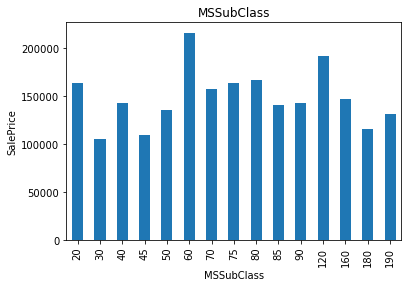

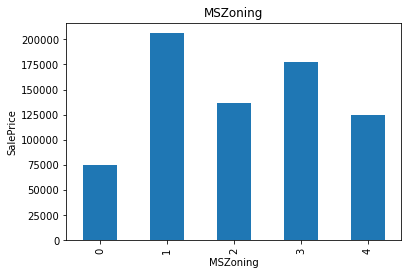

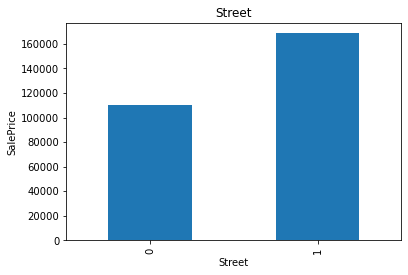

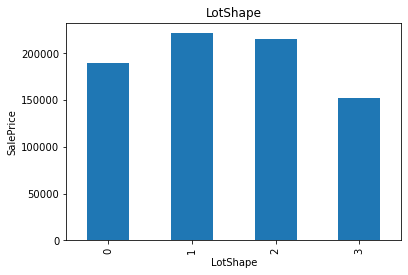

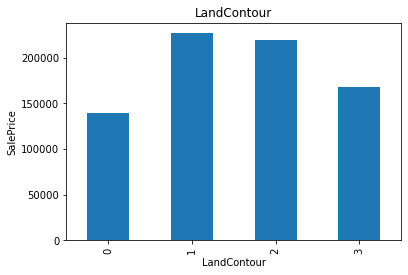

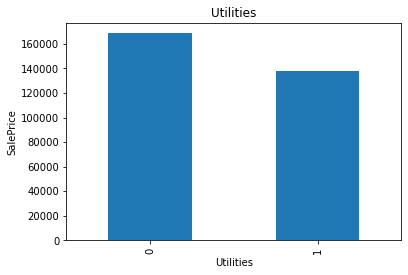

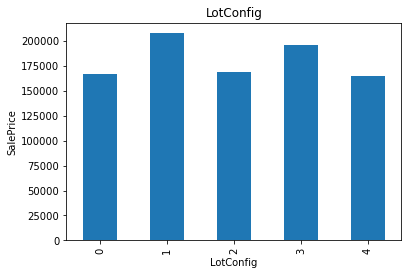

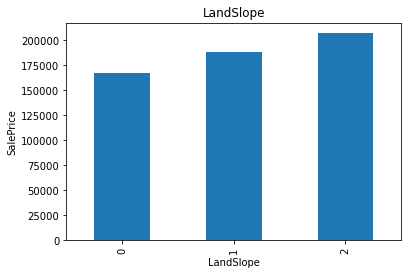

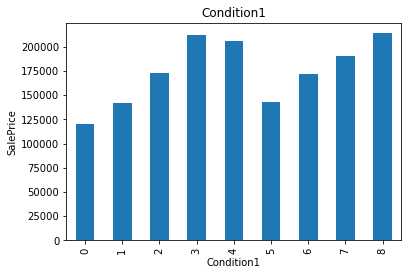

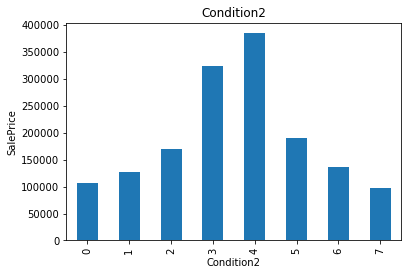

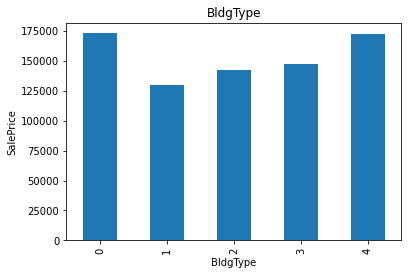

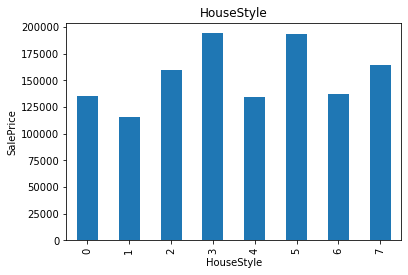

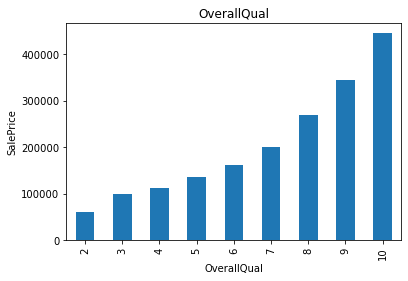

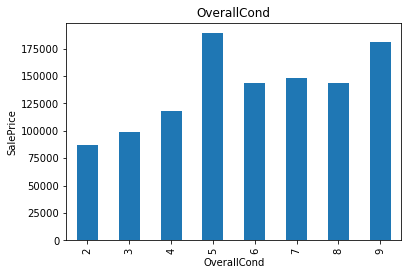

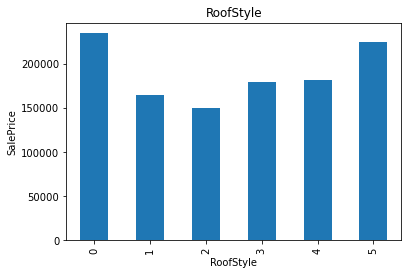

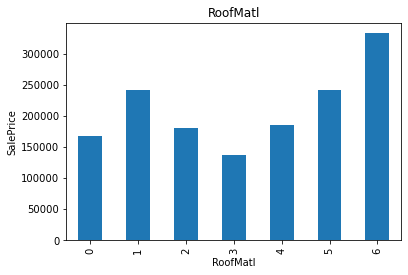

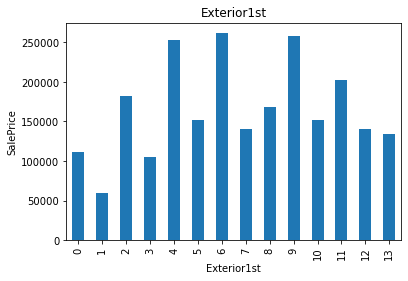

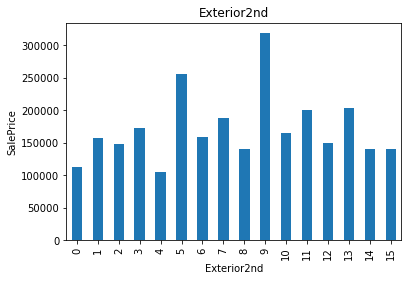

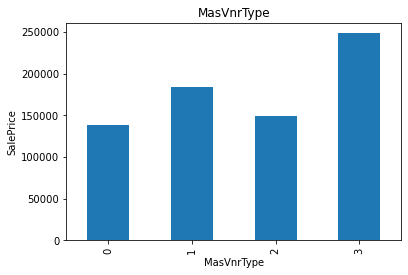

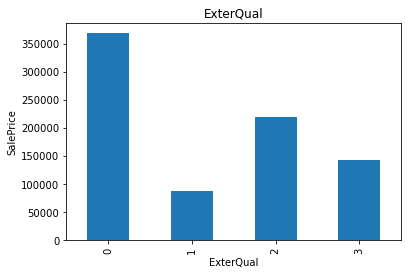

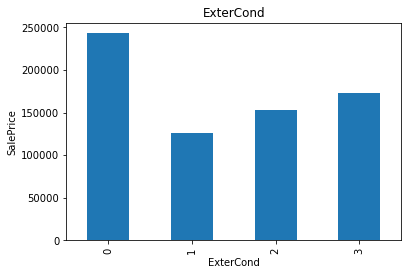

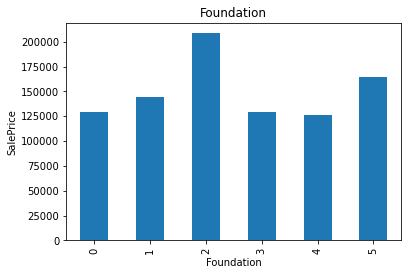

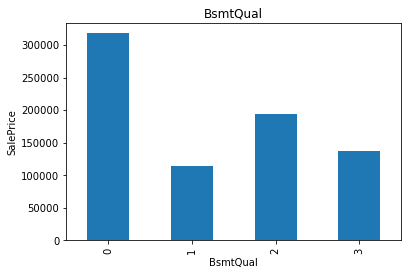

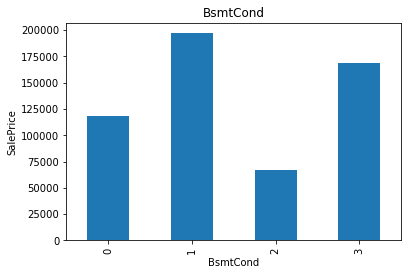

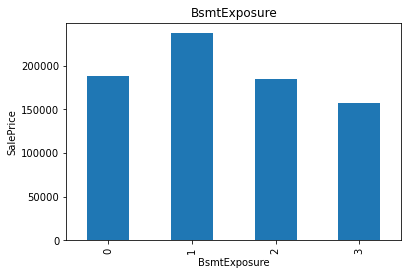

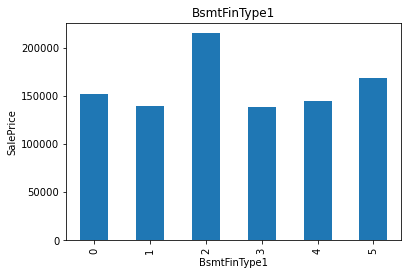

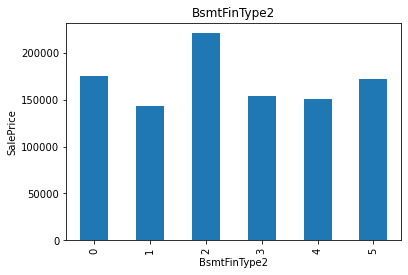

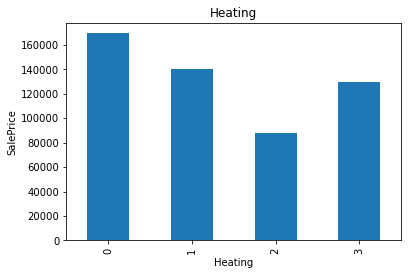

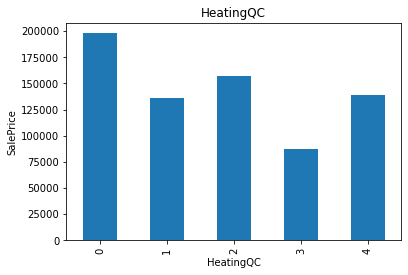

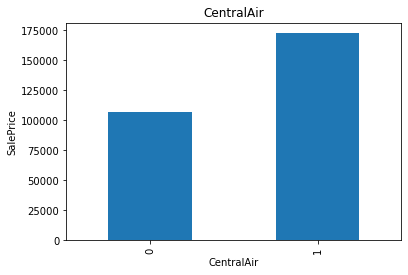

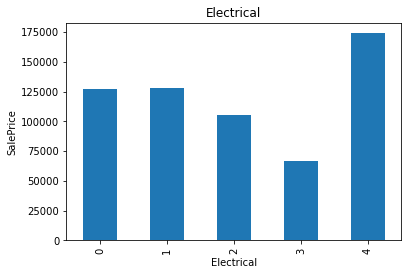

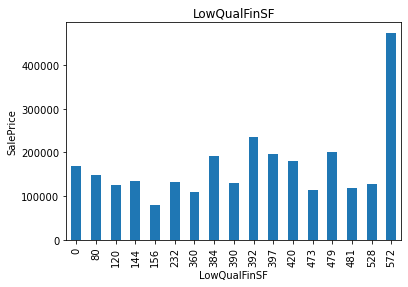

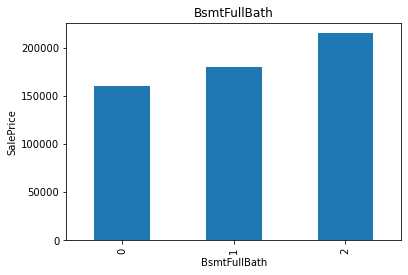

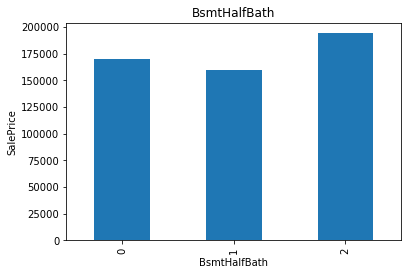

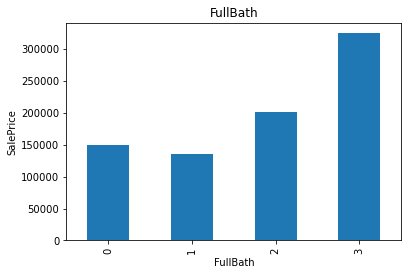

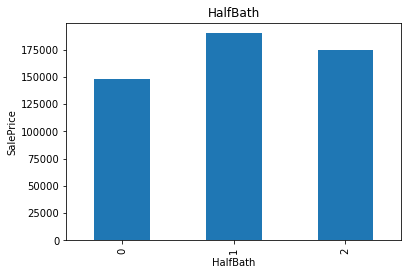

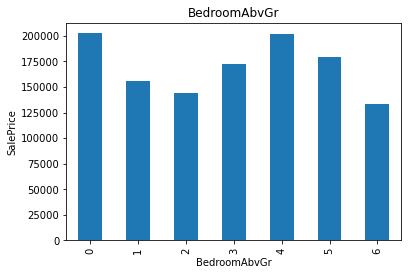

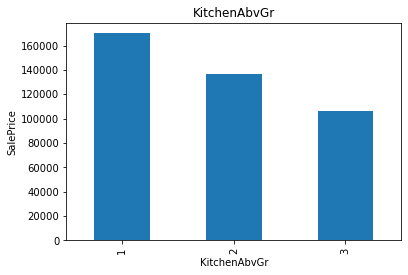

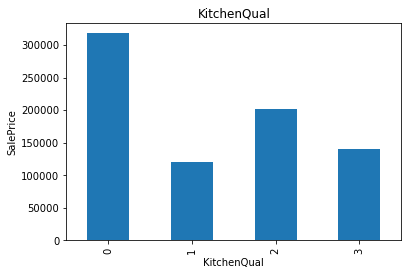

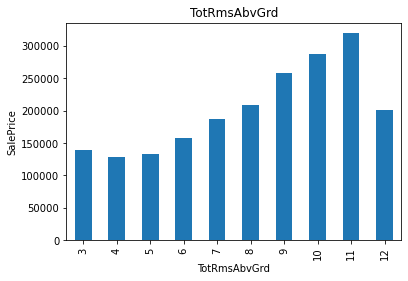

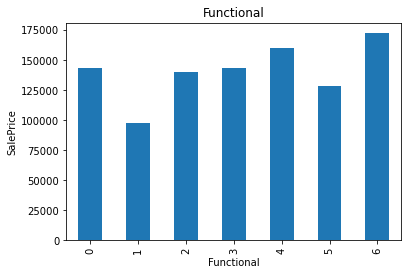

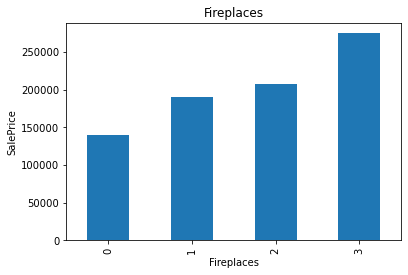

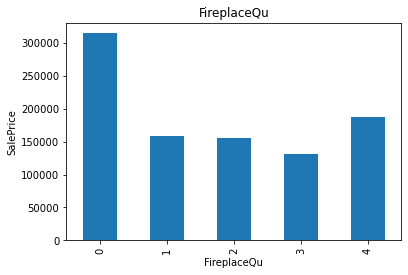

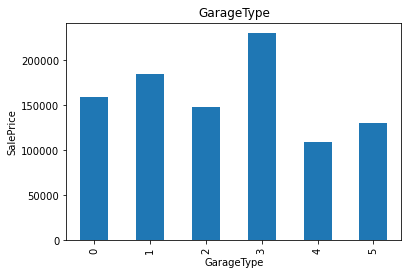

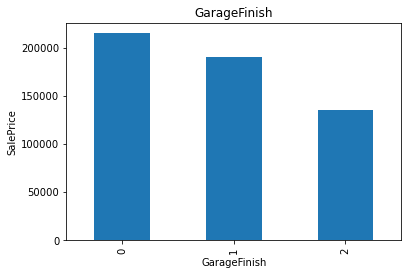

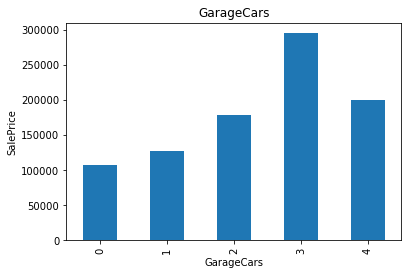

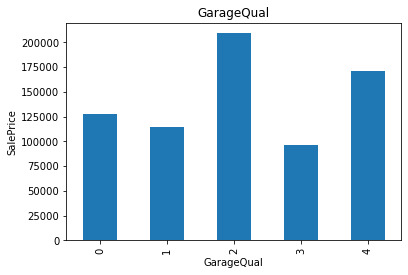

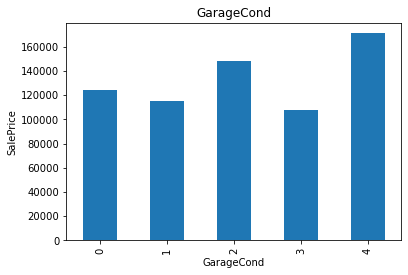

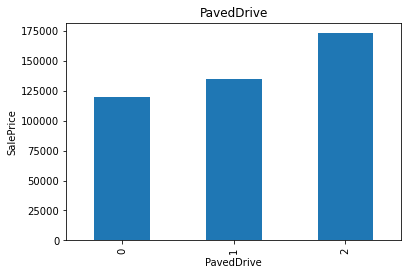

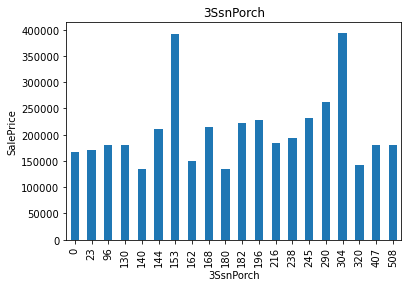

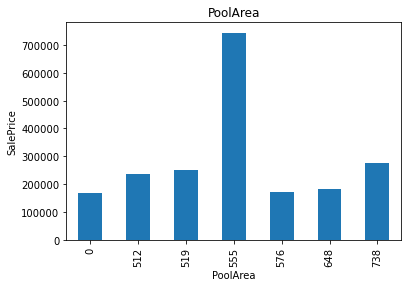

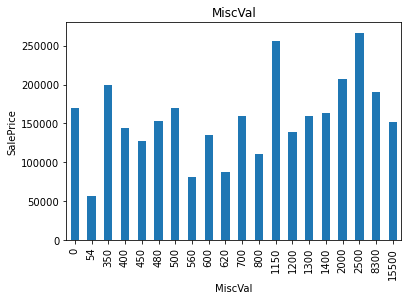

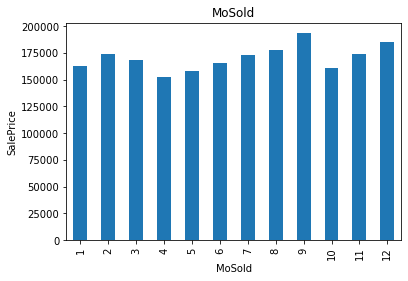

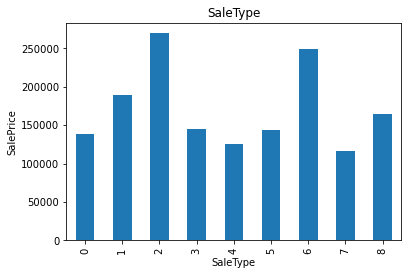

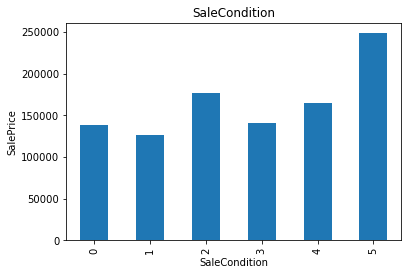

In [58]:
for feature in discrete_feature:
    train_data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [59]:
continuous_feature=[feature for feature in train_data if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 17


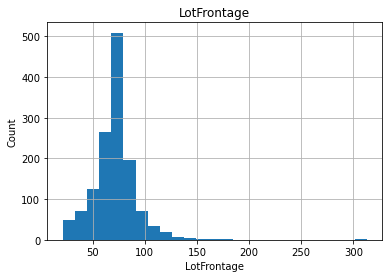

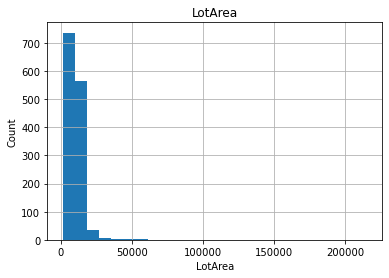

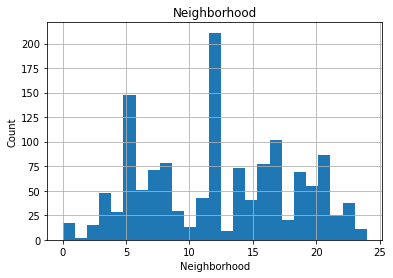

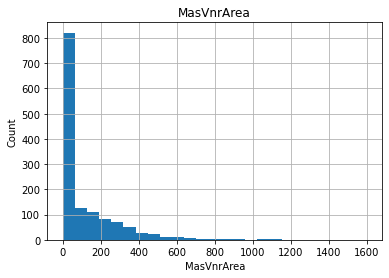

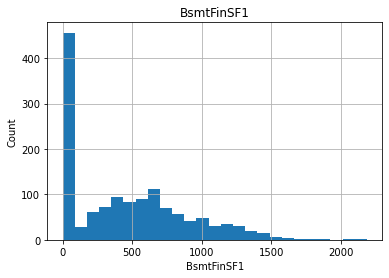

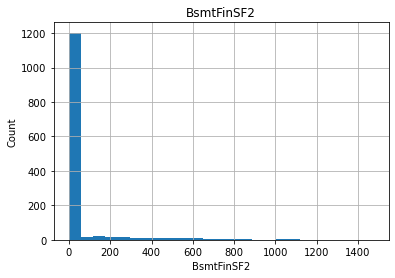

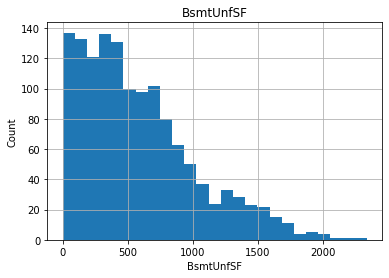

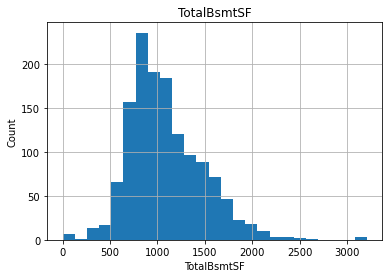

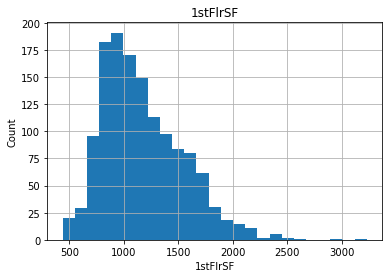

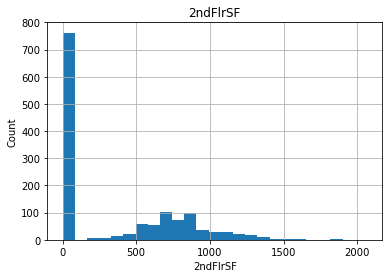

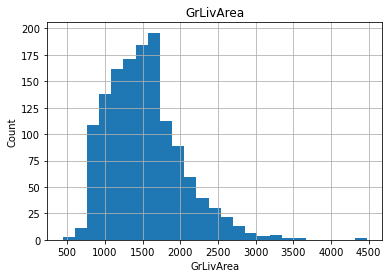

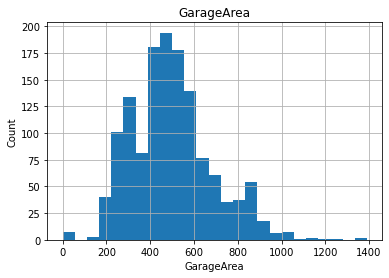

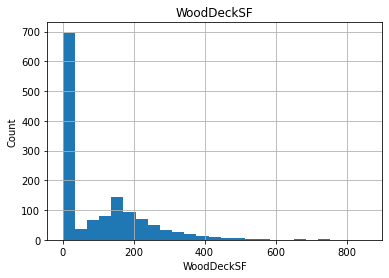

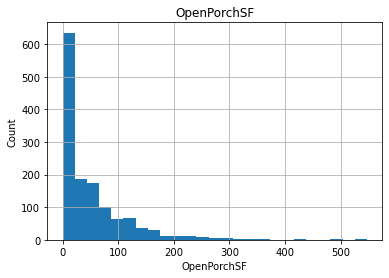

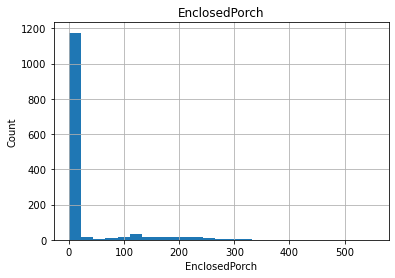

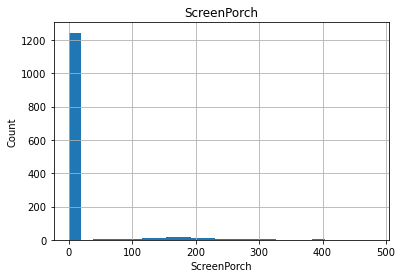

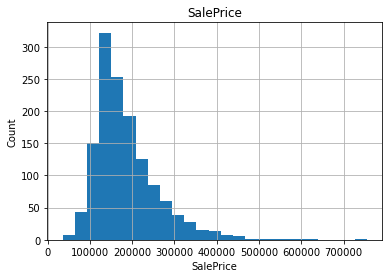

In [60]:
for feature in continuous_feature:
    train_data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

Removing Skewness

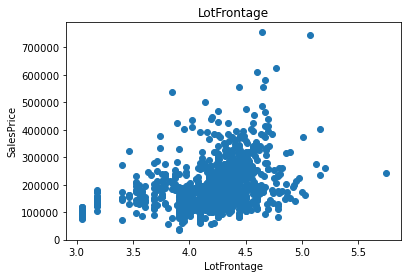

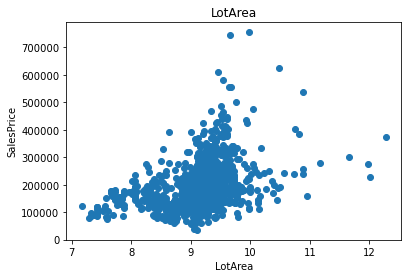

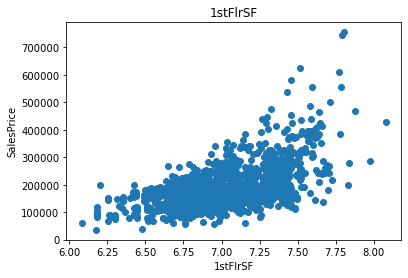

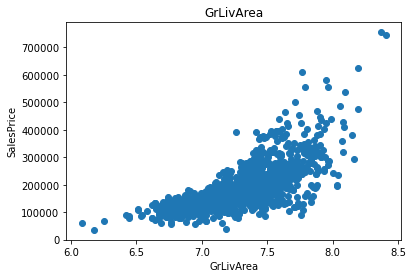

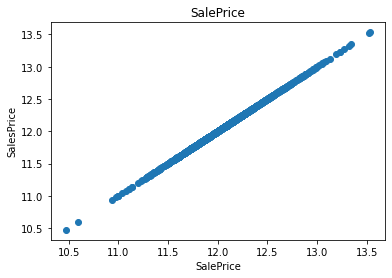

In [61]:
for feature in continuous_feature:
    if 0 in train_data[feature].unique():
        pass
    else:
        train_data[feature]=np.log(train_data[feature])
        plt.scatter(train_data[feature],train_data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

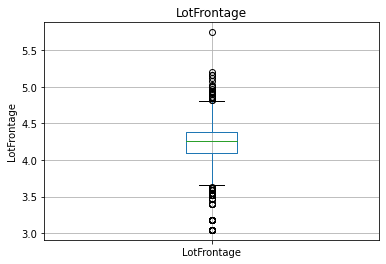

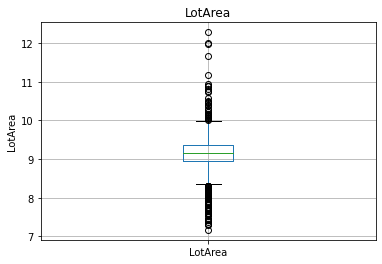

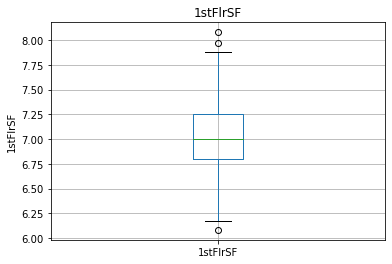

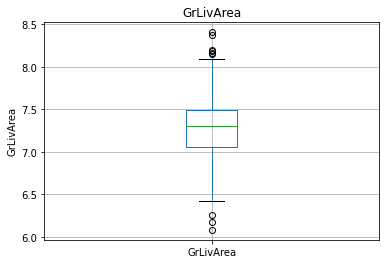

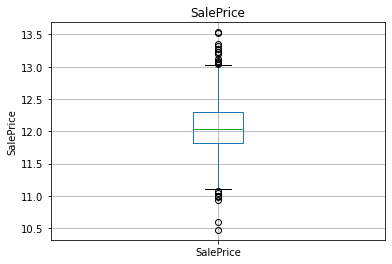

In [62]:
for feature in continuous_feature:
    if 0 in train_data[feature].unique():
        pass
    else:
        train_data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [63]:
data=train_data.copy()

In [64]:
from scipy.stats import zscore
z=np.abs(zscore(data))
data_n=data[(z<3).all(axis=1)]
data_n

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,4.174387,9.041922,1,3,3,0,4,0,5,2,2,0,5,7,5,5,5,1,0,11,13,1,196.0,2,3,2,2,3,3,2,706,5,0,150,856,0,0,1,4,6.752270,854,0,7.444249,1,0,2,1,3,1,2,8,6,0,2,1,5.0,1,2,548,4,4,2,0,61,0,0,0,0,0,2,2008,8,4,12.247694
2,3,60,3,4.219508,9.328123,1,0,3,0,4,0,5,2,2,0,5,7,5,7,6,1,0,11,13,1,162.0,2,3,2,2,3,2,2,486,5,0,434,920,0,0,1,4,6.824374,866,0,7.487734,1,0,2,1,3,1,2,6,6,1,4,1,7.0,1,2,608,4,4,2,0,42,0,0,0,0,0,9,2008,8,4,12.317167
4,5,60,3,4.430817,9.565214,1,0,3,0,2,0,15,2,2,0,5,8,5,8,8,1,0,11,13,1,350.0,2,3,2,2,3,0,2,655,5,0,490,1145,0,0,1,4,7.043160,1053,0,7.695303,1,0,2,1,4,1,2,9,6,1,4,1,8.0,1,3,836,4,4,2,192,84,0,0,0,0,0,12,2008,8,4,12.429216
6,7,20,3,4.317488,9.218705,1,3,3,0,4,0,21,2,2,0,2,8,5,3,2,1,0,11,13,3,186.0,2,3,2,0,3,0,2,1369,5,0,317,1686,0,0,1,4,7.434848,0,0,7.434848,1,0,2,0,3,1,2,7,6,1,2,1,3.0,1,2,636,4,4,2,255,57,0,0,0,0,0,8,2007,8,4,12.634603
10,11,20,3,4.248495,9.323669,1,3,3,0,4,0,19,2,2,0,2,5,5,43,43,3,0,5,6,2,0.0,3,3,1,3,3,3,4,906,5,0,134,1040,0,0,1,4,6.946976,0,0,6.946976,1,0,1,0,3,1,3,5,6,0,2,5,43.0,2,1,384,4,4,2,0,0,0,0,0,0,0,2,2008,8,4,11.771436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444,1445,20,3,4.143135,9.047821,1,3,3,0,2,0,5,2,2,0,2,7,5,3,3,1,0,11,13,1,106.0,2,3,2,2,3,0,5,0,5,0,1422,1422,0,0,1,4,7.259820,0,0,7.259820,0,0,2,0,3,1,2,7,6,0,2,1,3.0,1,2,626,4,4,2,192,60,0,0,0,0,0,11,2007,8,4,12.098487
1446,1447,20,3,4.255040,10.171298,1,0,3,0,1,0,11,2,2,0,2,5,7,48,48,1,0,5,6,1,189.0,3,3,1,3,3,3,4,593,5,0,595,1188,0,4,1,4,7.080026,0,0,7.080026,0,0,1,0,3,1,3,6,6,0,2,1,48.0,2,1,312,4,4,1,261,39,0,0,0,0,0,4,2010,8,4,11.969717
1447,1448,60,3,4.382027,9.210340,1,3,3,0,4,0,5,2,2,0,5,8,5,12,11,1,0,11,13,1,438.0,2,3,2,2,3,3,2,1079,5,0,141,1220,0,0,1,4,7.106606,870,0,7.644919,1,0,2,1,3,1,2,8,6,1,4,1,12.0,1,2,556,4,4,2,0,65,0,0,0,0,0,12,2007,8,4,12.388394
1451,1452,20,3,4.356709,9.133675,1,3,3,0,4,0,21,2,2,0,2,8,5,1,0,1,0,4,5,3,194.0,2,3,2,2,3,3,5,0,5,0,1573,1573,0,0,1,4,7.363914,0,0,7.363914,0,0,2,0,3,1,0,7,6,1,2,1,1.0,0,3,840,4,4,2,0,36,0,0,0,0,0,5,2009,6,5,12.567551


In [65]:

feature_scale=[feature for feature in data_n.columns if feature not in ['Id','SalePrice']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(data_n[feature_scale])

MinMaxScaler()

In [66]:
scaler.transform(data_n[feature_scale])


array([[0.28571429, 0.5       , 0.42735458, ..., 0.5       , 1.        ,
        0.5       ],
       [0.28571429, 0.5       , 0.45456461, ..., 0.5       , 1.        ,
        0.5       ],
       [0.28571429, 0.5       , 0.58199527, ..., 0.5       , 1.        ,
        0.5       ],
       ...,
       [0.28571429, 0.5       , 0.5525722 , ..., 0.25      , 1.        ,
        0.5       ],
       [0.        , 0.5       , 0.53730421, ..., 0.75      , 0.6       ,
        1.        ],
       [0.28571429, 0.5       , 0.39885857, ..., 0.25      , 1.        ,
        0.5       ]])

In [67]:
data_n = pd.concat([data_n[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(data_n[feature_scale]), columns=feature_scale)],
                    axis=1)

In [68]:
data_n.head()


,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,12.247694,0.285714,0.5,0.427355,0.523349,0.0,1.0,1.0,0.0,1.0,0.0,0.208333,0.5,0.0,0.0,0.714286,0.666667,0.4,0.05,0.083333,0.0,0.0,0.846154,0.866667,0.0,0.306250,0.5,1.0,0.666667,0.666667,1.0,1.000000,0.4,0.449109,1.0,0.0,0.081699,0.405687,0.0,0.0,0.0,1.0,0.371991,0.560735,0.0,0.615260,1.0,0.0,0.5,1.0,0.50,0.0,0.666667,0.625,1.0,0.0,0.5,0.0,0.056818,0.5,0.666667,0.520913,0.0,0.0,1.0,0.000000,0.254167,0.0,0.0,0.0,0.0,0.0,0.090909,0.50,1.0,0.5
1,3,12.317167,0.285714,0.5,0.454565,0.626356,0.0,0.0,1.0,0.0,1.0,0.0,0.208333,0.5,0.0,0.0,0.714286,0.666667,0.4,0.07,0.100000,0.0,0.0,0.846154,0.866667,0.0,0.253125,0.5,1.0,0.666667,0.666667,1.0,0.666667,0.4,0.309160,1.0,0.0,0.236383,0.436019,0.0,0.0,0.0,1.0,0.420962,0.568615,0.0,0.641464,1.0,0.0,0.5,1.0,0.50,0.0,0.666667,0.375,1.0,0.5,1.0,0.0,0.079545,0.5,0.666667,0.577947,0.0,0.0,1.0,0.000000,0.175000,0.0,0.0,0.0,0.0,0.0,0.727273,0.50,1.0,0.5
2,5,12.429216,0.285714,0.5,0.581995,0.711688,0.0,0.0,1.0,0.0,0.5,0.0,0.625000,0.5,0.0,0.0,0.714286,0.833333,0.4,0.08,0.133333,0.0,0.0,0.846154,0.866667,0.0,0.546875,0.5,1.0,0.666667,0.666667,1.0,0.000000,0.4,0.416667,1.0,0.0,0.266885,0.542654,0.0,0.0,0.0,1.0,0.569556,0.691399,0.0,0.766546,1.0,0.0,0.5,1.0,0.75,0.0,0.666667,0.750,1.0,0.5,1.0,0.0,0.090909,0.5,1.000000,0.794677,0.0,0.0,1.0,0.410256,0.350000,0.0,0.0,0.0,0.0,0.0,1.000000,0.50,1.0,0.5
3,7,12.634603,0.000000,0.5,0.513652,0.586975,0.0,1.0,1.0,0.0,1.0,0.0,0.875000,0.5,0.0,0.0,0.285714,0.833333,0.4,0.03,0.033333,0.0,0.0,0.846154,0.866667,1.0,0.290625,0.5,1.0,0.666667,0.000000,1.0,0.000000,0.4,0.870865,1.0,0.0,0.172658,0.799052,0.0,0.0,0.0,1.0,0.835580,0.000000,0.0,0.609595,1.0,0.0,0.5,0.0,0.50,0.0,0.666667,0.500,1.0,0.5,0.5,0.0,0.034091,0.5,0.666667,0.604563,0.0,0.0,1.0,0.544872,0.237500,0.0,0.0,0.0,0.0,0.0,0.636364,0.25,1.0,0.5
4,11,11.771436,0.000000,0.5,0.472046,0.624753,0.0,1.0,1.0,0.0,1.0,0.0,0.791667,0.5,0.0,0.0,0.285714,0.333333,0.4,0.43,0.716667,1.0,0.0,0.384615,0.400000,0.5,0.000000,1.0,1.0,0.333333,1.000000,1.0,1.000000,0.8,0.576336,1.0,0.0,0.072985,0.492891,0.0,0.0,0.0,1.0,0.504230,0.000000,0.0,0.315601,1.0,0.0,0.0,0.0,0.50,0.0,1.000000,0.250,1.0,0.0,0.5,1.0,0.488636,1.0,0.333333,0.365019,0.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.090909,0.50,1.0,0.5


In [69]:
x=data_n.drop(columns=['SalePrice','Id'],axis=1)
x.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.285714,0.5,0.427355,0.523349,0.0,1.0,1.0,0.0,1.0,0.0,0.208333,0.5,0.0,0.0,0.714286,0.666667,0.4,0.05,0.083333,0.0,0.0,0.846154,0.866667,0.0,0.306250,0.5,1.0,0.666667,0.666667,1.0,1.000000,0.4,0.449109,1.0,0.0,0.081699,0.405687,0.0,0.0,0.0,1.0,0.371991,0.560735,0.0,0.615260,1.0,0.0,0.5,1.0,0.50,0.0,0.666667,0.625,1.0,0.0,0.5,0.0,0.056818,0.5,0.666667,0.520913,0.0,0.0,1.0,0.000000,0.254167,0.0,0.0,0.0,0.0,0.0,0.090909,0.50,1.0,0.5
1,0.285714,0.5,0.454565,0.626356,0.0,0.0,1.0,0.0,1.0,0.0,0.208333,0.5,0.0,0.0,0.714286,0.666667,0.4,0.07,0.100000,0.0,0.0,0.846154,0.866667,0.0,0.253125,0.5,1.0,0.666667,0.666667,1.0,0.666667,0.4,0.309160,1.0,0.0,0.236383,0.436019,0.0,0.0,0.0,1.0,0.420962,0.568615,0.0,0.641464,1.0,0.0,0.5,1.0,0.50,0.0,0.666667,0.375,1.0,0.5,1.0,0.0,0.079545,0.5,0.666667,0.577947,0.0,0.0,1.0,0.000000,0.175000,0.0,0.0,0.0,0.0,0.0,0.727273,0.50,1.0,0.5
2,0.285714,0.5,0.581995,0.711688,0.0,0.0,1.0,0.0,0.5,0.0,0.625000,0.5,0.0,0.0,0.714286,0.833333,0.4,0.08,0.133333,0.0,0.0,0.846154,0.866667,0.0,0.546875,0.5,1.0,0.666667,0.666667,1.0,0.000000,0.4,0.416667,1.0,0.0,0.266885,0.542654,0.0,0.0,0.0,1.0,0.569556,0.691399,0.0,0.766546,1.0,0.0,0.5,1.0,0.75,0.0,0.666667,0.750,1.0,0.5,1.0,0.0,0.090909,0.5,1.000000,0.794677,0.0,0.0,1.0,0.410256,0.350000,0.0,0.0,0.0,0.0,0.0,1.000000,0.50,1.0,0.5
3,0.000000,0.5,0.513652,0.586975,0.0,1.0,1.0,0.0,1.0,0.0,0.875000,0.5,0.0,0.0,0.285714,0.833333,0.4,0.03,0.033333,0.0,0.0,0.846154,0.866667,1.0,0.290625,0.5,1.0,0.666667,0.000000,1.0,0.000000,0.4,0.870865,1.0,0.0,0.172658,0.799052,0.0,0.0,0.0,1.0,0.835580,0.000000,0.0,0.609595,1.0,0.0,0.5,0.0,0.50,0.0,0.666667,0.500,1.0,0.5,0.5,0.0,0.034091,0.5,0.666667,0.604563,0.0,0.0,1.0,0.544872,0.237500,0.0,0.0,0.0,0.0,0.0,0.636364,0.25,1.0,0.5
4,0.000000,0.5,0.472046,0.624753,0.0,1.0,1.0,0.0,1.0,0.0,0.791667,0.5,0.0,0.0,0.285714,0.333333,0.4,0.43,0.716667,1.0,0.0,0.384615,0.400000,0.5,0.000000,1.0,1.0,0.333333,1.000000,1.0,1.000000,0.8,0.576336,1.0,0.0,0.072985,0.492891,0.0,0.0,0.0,1.0,0.504230,0.000000,0.0,0.315601,1.0,0.0,0.0,0.0,0.50,0.0,1.000000,0.250,1.0,0.0,0.5,1.0,0.488636,1.0,0.333333,0.365019,0.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.090909,0.50,1.0,0.5


In [70]:
y=data_n['SalePrice']
y.head()

0    12.247694
1    12.317167
2    12.429216
3    12.634603
4    11.771436
Name: SalePrice, dtype: float64

In [71]:
#checking the shape of input and target variable
print(x.shape,'\t\t',y.shape)

(577, 75) 		 (577,)


In [72]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

In [73]:
print(x_train.shape,'\t\t',x_test.shape)

(432, 75) 		 (145, 75)


In [74]:
print(y_train.shape,'\t',y_test.shape)

(432,) 	 (145,)


In [75]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#Importing Boosting models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor

#Importing error metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score

In [76]:
model=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),Ridge(),ElasticNet(),
       RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),BaggingRegressor(),ExtraTreesRegressor()]


for m in model:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Score of',m,'is:',score)
    print('MAE:',mean_absolute_error(y_test,predm))
    print('MSE:',mean_squared_error(y_test,predm))
    print('RMSE:',np.sqrt(mean_squared_error(y_test,predm)))
    print('R2_score:',r2_score(y_test,predm))
    print('************************************')
    print('\n')

Score of LinearRegression() is: 0.9383408100344884
MAE: 0.0736903197787891
MSE: 0.012594485877285663
RMSE: 0.11222515706064155
R2_score: 0.88598518921207
************************************


Score of SVR() is: 0.9415654474288968
MAE: 0.07874972202347486
MSE: 0.013962064385561263
RMSE: 0.11816117968927554
R2_score: 0.8736048343188311
************************************


Score of DecisionTreeRegressor() is: 1.0
MAE: 0.13143276959554953
MSE: 0.03223265958847046
RMSE: 0.17953456377107574
R2_score: 0.7082055893365896
************************************


Score of KNeighborsRegressor() is: 0.8473789289872662
MAE: 0.11381213839429484
MSE: 0.02454923360248779
RMSE: 0.15668195046809888
R2_score: 0.7777617719811547
************************************


Score of Lasso() is: 0.0
MAE: 0.27373991565676137
MSE: 0.11049735097659148
RMSE: 0.332411418240396
R2_score: -0.0003055850723405751
************************************


Score of Ridge() is: 0.9379341294088678
MAE: 0.07420949063082503
MSE: 

In [77]:
parameters={'n_estimators':[10,50,100,200]}
RFR=RandomForestRegressor()

clf=GridSearchCV(RFR,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'n_estimators': 200}


In [78]:
parameters={'n_estimators':[10,100,200,300]}
gbr=GradientBoostingRegressor()

clf=GridSearchCV(gbr,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'n_estimators': 200}


In [79]:
parameters={'n_estimators':[10,50,100,200]}
br=BaggingRegressor()

clf=GridSearchCV(br,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'n_estimators': 100}


In [80]:
parameters={'n_estimators':[10,50,100,200]}
etr=ExtraTreesRegressor()

clf=GridSearchCV(RFR,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'n_estimators': 100}


In [81]:
LR=LinearRegression()

KNN=KNeighborsRegressor(algorithm='auto',n_neighbors=15,weights='uniform')

DT=DecisionTreeRegressor(criterion='friedman_mse', random_state=55)

SVR=SVR(kernel='linear',C=1)

Ridge=Ridge(alpha=5,random_state=49,solver='sag')

RF=RandomForestRegressor(n_estimators=200,criterion='mse')

GB=GradientBoostingRegressor(criterion='friedman_mse', random_state=42, learning_rate=0.1, n_estimators=300, max_depth=4)

Bagg=BaggingRegressor(n_estimators=200, max_features=1.0, max_samples=1.0, random_state=54)

ETR=ExtraTreesRegressor(n_estimators=200)

In [82]:
models=[]
models.append(('LinearRegression',LR))
models.append(('KNeighborsRegressor',KNN))
models.append(('DecisionTreeRegressor',DT))
models.append(('SupportVectorRegressor',SVR))
models.append(('Ridge',Ridge))
models.append(('RandomForestRegressor',RF))
models.append(('GradientBoostingRegressor',GB))
models.append(('BaggingRegressor',Bagg))
models.append(('ExtraTreesRegressor',ETR))

In [83]:
Model=[]
Score=[]
R2_Score=[]
CVS=[]
MAE=[]
MSE=[]
RMSE=[]

for name,model in models:
    print('******************',name,'*****************************')
    print('\n')
    Model.append(name)
   
    model.fit(x_train,y_train)
    print(model)
    
    #Score
    score=model.score(x_train,y_train)
    print('Score:',score)
    Score.append(score * 100)
    print('\n')
    
    pred=model.predict(x_test)
    print('\n')
    
    #R2_score
    r_score=r2_score(y_test,pred)
    print('R2_score:',r_score)
    R2_Score.append(r_score * 100)
    print('\n')
    
    #Cross Val Score
    cross_val=cross_val_score(model,x,y,cv=15,scoring='r2').mean()
    print('Cross Val Score:',cross_val)
    CVS.append(cross_val * 100)
    print('\n')
    
    #MAE
    mae=mean_absolute_error(y_test,pred)
    print('MAE:',mae)
    MAE.append(mae)
    print('\n')
    
    #MSE
    mse=mean_squared_error(y_test,pred)
    print('MSE:',mse)
    MSE.append(mse)
    print('\n')
    
    #RMSE
    rmse=np.sqrt(mean_squared_error(y_test,pred))
    print('RMSE:',rmse)
    RMSE.append(rmse)
    print('\n\n')

****************** LinearRegression *****************************


LinearRegression()
Score: 0.9383408100344884




R2_score: 0.88598518921207


Cross Val Score: -2873890141035.804


MAE: 0.0736903197787891


MSE: 0.012594485877285663


RMSE: 0.11222515706064155



****************** KNeighborsRegressor *****************************


KNeighborsRegressor(n_neighbors=15)
Score: 0.7725132778293987




R2_score: 0.7426790982313629


Cross Val Score: 0.7565237134937572


MAE: 0.1279053982984905


MSE: 0.02842459186538067


RMSE: 0.1685959426124504



****************** DecisionTreeRegressor *****************************


DecisionTreeRegressor(criterion='friedman_mse', random_state=55)
Score: 1.0




R2_score: 0.7139722992975877


Cross Val Score: 0.7284327601148237


MAE: 0.13260792308382036


MSE: 0.03159564807513924


RMSE: 0.1777516471798201



****************** SupportVectorRegressor *****************************


SVR(C=1, kernel='linear')
Score: 0.9321545646659578




R2_score: 0.

In [84]:
result=pd.DataFrame({'Model':Model,'Score':Score,'R2_Score':R2_Score,'Cross_Val_Score':CVS,'MAE':MAE,'MSE':MSE,'RMSE':RMSE})
result

,Model,Score,R2_Score,Cross_Val_Score,MAE,MSE,RMSE
0,LinearRegression,93.834081,88.598519,-2.873890e+14,0.073690,0.012594,0.112225
1,KNeighborsRegressor,77.251328,74.267910,7.565237e+01,0.127905,0.028425,0.168596
2,DecisionTreeRegressor,100.000000,71.397230,7.284328e+01,0.132608,0.031596,0.177752
3,SupportVectorRegressor,93.215456,88.201507,9.016219e+01,0.077074,0.013033,0.114162
4,Ridge,92.586382,88.236220,9.023412e+01,0.077141,0.012995,0.113994
5,RandomForestRegressor,98.161288,84.658059,8.706642e+01,0.089585,0.016947,0.130182
6,GradientBoostingRegressor,99.955757,85.526968,8.814014e+01,0.092039,0.015987,0.126441
7,BaggingRegressor,98.252929,84.547367,8.709188e+01,0.089356,0.017070,0.130650
8,ExtraTreesRegressor,100.000000,84.623786,8.654617e+01,0.090641,0.016985,0.130327


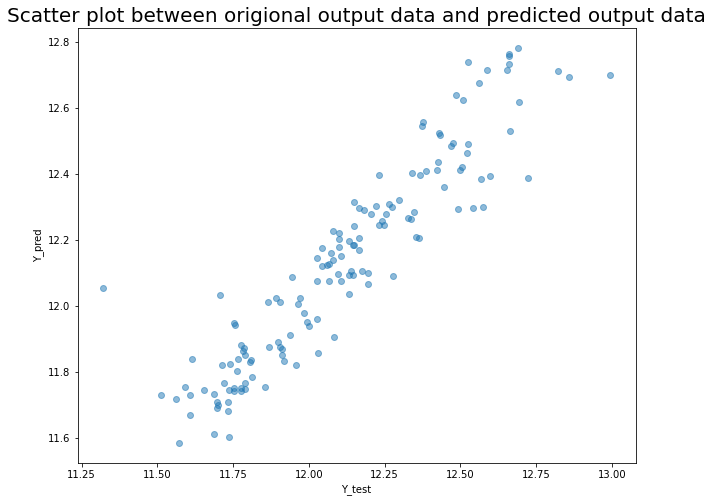

In [85]:
plt.figure(figsize=(10,8))
plt.scatter(y_test, GB.predict(x_test), alpha = 0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.title("Scatter plot between origional output data and predicted output data",fontsize=20)
plt.show()

In [86]:
import joblib

# Save the model as a pickle in a file
joblib.dump(GB,'Advanced House_Price.pkl')

['Advanced House_Price.pkl']